In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [89]:
df=pd.read_csv('bank.csv')

In [90]:
# x=df.drop(columns=['deposit'])
# y=df['deposit']
y=df.iloc[:,-1].values.reshape(-1,1)
x=df.iloc[:,:-1]

In [91]:
x.shape

(11162, 16)

In [92]:
y=pd.DataFrame(y)

In [93]:
y.shape

(11162, 1)

In [94]:
label=LabelEncoder()

In [95]:
x['job']=label.fit_transform(x['job'])
x['marital']=label.fit_transform(x['marital'])
x['education']=label.fit_transform(x['education'])
x['default']=label.fit_transform(x['default'])
x['housing']=label.fit_transform(x['housing'])
x['loan']=label.fit_transform(x['loan'])
x['contact']=label.fit_transform(x['contact'])
x['month']=label.fit_transform(x['month'])
x['poutcome']=label.fit_transform(x['poutcome'])

In [96]:
y=label.fit_transform(y)


/Users/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [98]:
# Y=pd.DataFrame(y)

In [99]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [100]:
Y

,0
0,0
1,0
2,0
3,0
4,0
...,...
11157,0
11158,0
11159,0
11160,0


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)

In [102]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [122]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred_linear=svm_linear.predict(x_test)
accuracy_linear=accuracy_score(y_pred_linear,y_test)
cm_linear=confusion_matrix(y_test,y_pred_linear)
print(f"accuracy of linear model:{accuracy_linear *100:0.2f}%")

accuracy of linear model:80.16%


In [131]:
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)
y_pred_rbf=svm_rbf.predict(x_test)
accuracy_rbf=accuracy_score(y_pred_rbf,y_test)
cm_rbf=confusion_matrix(y_test,y_pred_rbf)
print(f"accuracy of rbf model:{accuracy_rbf *100:0.2f}%")

accuracy of rbf model:81.77%


In [134]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred_poly=svm_poly.predict(x_test)
accuracy_poly=accuracy_score(y_pred_poly,y_test)
cm_poly=confusion_matrix(y_test,y_pred_poly)
print(f"accuracy of linear model:{accuracy_poly *100:0.2f}%")

accuracy of linear model:80.70%


In [144]:
def plot_confusion_matrix(cm,title):
    plt.figure(figsize=(6,8))
    sns.heatmap(cm,annot=True,fmt="d",cmap="winter",cbar=False)
    plt.title(title)
    plt.xlabel("predicted")
    plt.ylabel("actual")

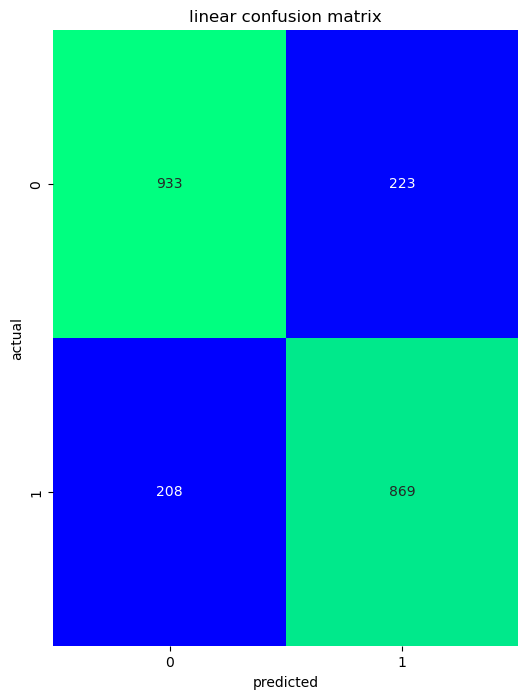

In [145]:
plot_confusion_matrix(cm_linear,'linear confusion matrix')

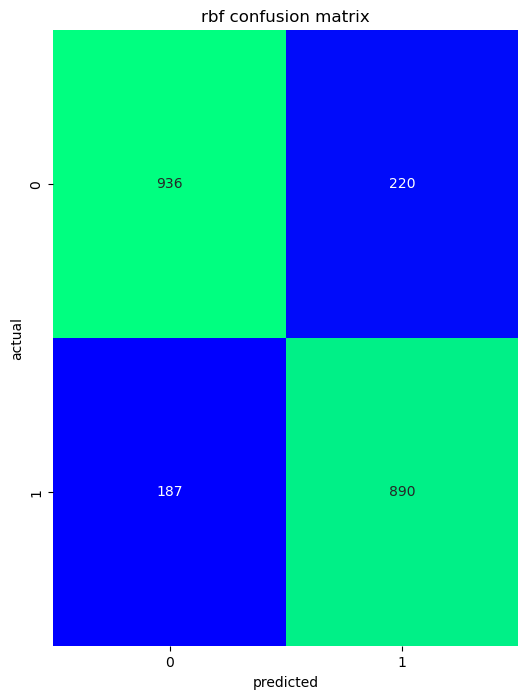

In [146]:
plot_confusion_matrix(cm_rbf,'rbf confusion matrix')

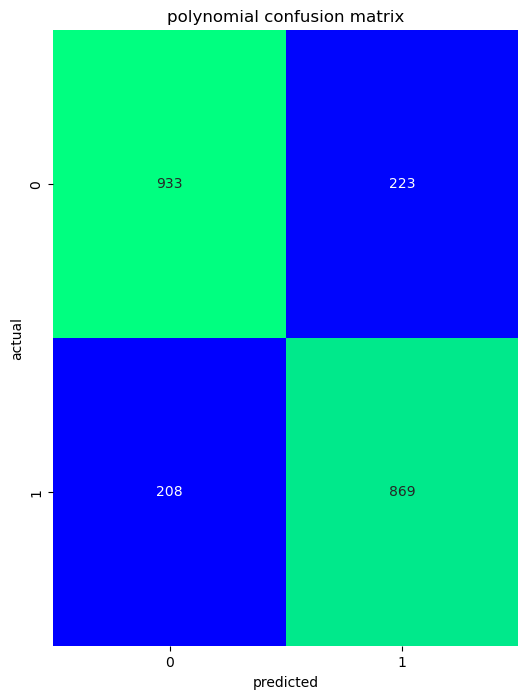

In [147]:
plot_confusion_matrix(cm_poly,'polynomial confusion matrix')

In [148]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
accuracy_rf=accuracy_score(y_test,y_pred_rf)
cm_rf=confusion_matrix(y_test,y_pred_rf)
print(f"accuracy of rf mode :{accuracy_rf*100:0.2f}%")

accuracy of rf mode :84.42%


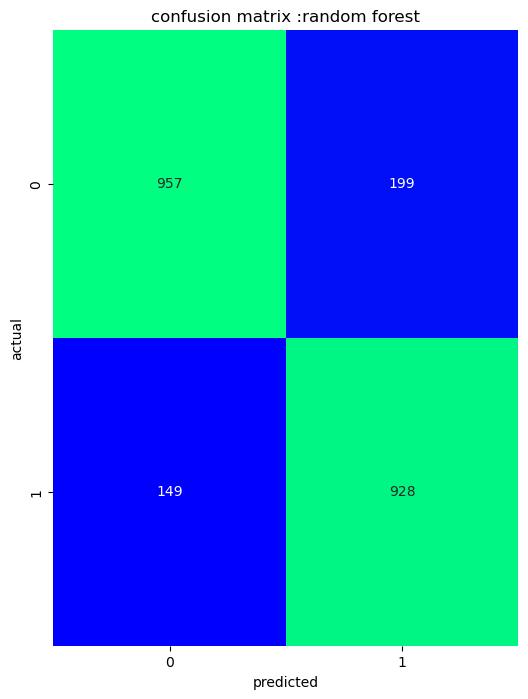

In [149]:
plot_confusion_matrix(cm_rf,'confusion matrix :random forest')

In [186]:
ann=Sequential()
ann.add(Dense(32,input_dim=16,activation='relu'))
ann.add(Dense(16,activation='relu'))
ann.add(Dense(2,activation='softmax'))

/Users/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [206]:
ann.compile(optimizer="adam",
           loss="sparse_categorical_crossentropy",
           metrics=["accuracy"])

In [207]:
# Yann=to_categorical(y)
# x_train_ann,x_test_ann,y_train_ann,y_test_ann=train_test_split(x,Yann1,test_size=0.2,random_state=1234)


In [208]:
Yann1=pd.DataFrame(Yann)

In [224]:
# ann.fit(x_train_ann,y_train_ann,epochs=1000,batch_size=32)
ann.fit(x_train,y_train,epochs=1000,batch_size=32)

Epoch 1/1000
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.8064 - loss: 0.4313
Epoch 2/1000
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.8124 - loss: 0.4217
Epoch 3/1000
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8088 - loss: 0.4258
Epoch 4/1000
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.8135 - loss: 0.4138
Epoch 5/1000
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.8085 - loss: 0.4234
Epoch 6/1000
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.8120 - loss: 0.4204
Epoch 7/1000
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.8092 - loss: 0.4177
Epoch 8/1000
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.8064 - loss: 0.4263
Epoch 9/1000
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.8130 - loss: 0.4166
Epoch 10/1000
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8100 - loss: 0.4163
Epoch 11/1000
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.8104 - loss: 0.4159
Epoch 12

In [225]:
y_pred_ann=ann.predict(x_test_ann)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step


In [226]:
y_pred_ann2=np.argmax(y_pred_ann,axis=1)

In [227]:
# y_pred_ann2

In [228]:
y_test_ann2=np.argmax(y_test_ann,axis=1)

In [229]:
# y_test_ann

In [230]:
accuracy_ann=accuracy_score(y_test_ann2,y_pred_ann2)

In [231]:
print(f"accuracy of ann :{accuracy_ann*100:0.2f}%")

accuracy of ann :46.84%
